In [1]:
# 載入相關套件
import numpy as np
import pandas as pd

# 繪圖相關套件
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns
plt.style.use( 'ggplot' ) 

In [2]:
df = pd.read_csv('CreditScoring.csv')

In [3]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808717,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


## Variables Interpretation
BAD  : 1 = applicant defaulted on loan or seriously delinquent; 0 = applicant paid loan

LOAN  :  Amount of the loan request

MORTDUE  :  Amount due on existing mortgage

VALUE  :  Value of current property

REASON  : DebtCon = debt consolidation; HomeImp = home improvement

JOB  :  Occupational categories

YOJ  :  Years at present job

DEROG : Number of major derogatory reports

DELINQ : Number of delinquent credit lines

CLAGE : Age of oldest credit line in months

NINQ : Number of recent credit inquiries

CLNO : Number of credit lines

DEBTINC : Debt-to-income ratio


In [4]:
#觀察有無缺漏值及資料型態
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [5]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [6]:
def Missing_Counts(df) : 
    missing = df.isnull().sum()  # 計算欄位中缺漏值的數量 
    missing = missing[ missing>0 ]
    missing.sort_values( inplace=True ) 
    
    Missing_Count = pd.DataFrame( { 'ColumnName':missing.index, 'MissingCount':missing.values } )  # Convert Series to DataFrame
    Missing_Count[ 'Percentage(%)' ] = Missing_Count['MissingCount'].apply( lambda x:round(x/df.shape[0]*100,2) )
    return  Missing_Count

In [7]:
print( 'train :' )
print( Missing_Counts(df) )

train :
   ColumnName  MissingCount  Percentage(%)
0       VALUE           112           1.88
1        CLNO           222           3.72
2      REASON           252           4.23
3         JOB           279           4.68
4       CLAGE           308           5.17
5        NINQ           510           8.56
6         YOJ           515           8.64
7     MORTDUE           518           8.69
8      DELINQ           580           9.73
9       DEROG           708          11.88
10    DEBTINC          1267          21.26


## 資料分析 
了解基本資料型態後，開始對資料進行相關性分析

In [8]:
BAD_Counts = df['BAD'].value_counts().reset_index()
BAD_Counts.columns = ['BAD','Counts']

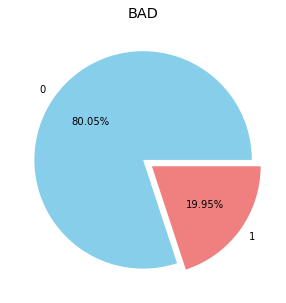

In [9]:
plt.figure( figsize=(10,5) )
df['BAD'].value_counts().plot( kind='pie',explode=(0,0.1) ,colors=['skyblue','lightcoral'], autopct='%1.2f%%' )
plt.title( 'BAD' )  # 圖標題
plt.ylabel( '' )
plt.show()

In [10]:
# BAD 與其他欄位間的相關係數
Corr_Matrix = df.corr()  # 計算相關係數
Corr = Corr_Matrix.loc['BAD',:].sort_values()[:-1]
Corr = pd.DataFrame({ 'BAD':Corr })
Corr

,BAD
CLAGE,-0.170499
LOAN,-0.075099
YOJ,-0.060238
MORTDUE,-0.048219
VALUE,-0.029954
CLNO,-0.004157
NINQ,0.174980
DEBTINC,0.199835
DEROG,0.276081
DELINQ,0.354107


<AxesSubplot:xlabel='LOAN', ylabel='Count'>

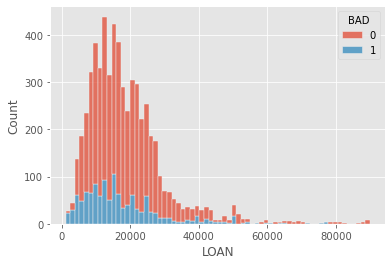

In [11]:
sns.histplot(data=df, x="LOAN",hue='BAD',multiple="stack")

<AxesSubplot:xlabel='YOJ', ylabel='Count'>

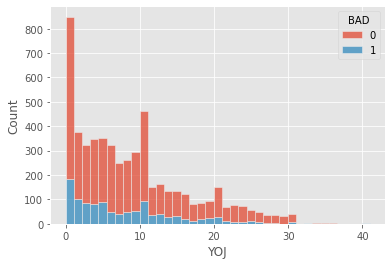

In [12]:
sns.histplot(data=df, x="YOJ",hue='BAD',multiple="stack")

<AxesSubplot:xlabel='MORTDUE', ylabel='Count'>

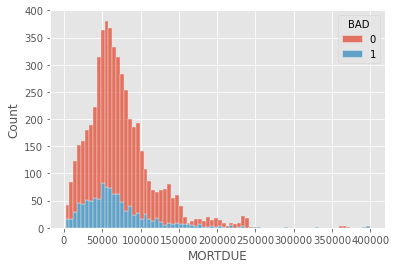

In [13]:
sns.histplot(data=df, x='MORTDUE', hue='BAD',multiple="stack")

<AxesSubplot:xlabel='VALUE', ylabel='Count'>

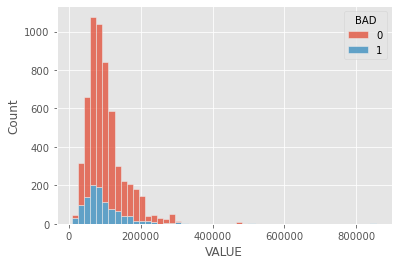

In [14]:
sns.histplot(data=df, x="VALUE",hue='BAD',bins=50,multiple="stack")

<AxesSubplot:xlabel='CLNO', ylabel='Count'>

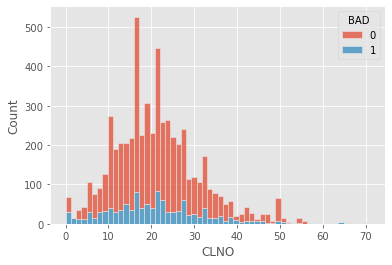

In [15]:
sns.histplot(data=df, x='CLNO', hue='BAD',multiple="stack")

<AxesSubplot:xlabel='NINQ', ylabel='count'>

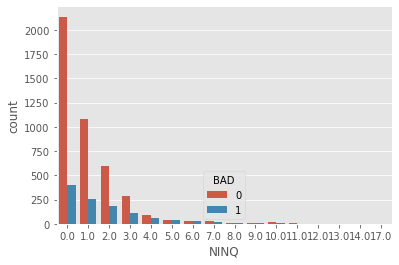

In [16]:
sns.countplot(data=df, x='NINQ', hue='BAD')

<AxesSubplot:xlabel='DEBTINC', ylabel='Count'>

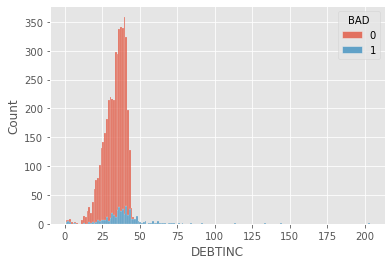

In [17]:
sns.histplot(data=df, x='DEBTINC', hue='BAD',multiple="stack")

<AxesSubplot:xlabel='DEROG', ylabel='count'>

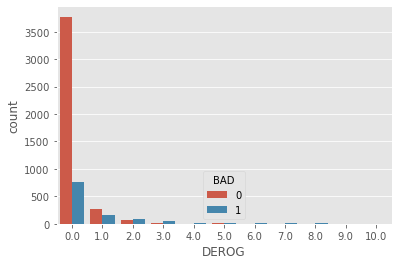

In [18]:
sns.countplot(data=df, x="DEROG",hue='BAD')

<AxesSubplot:xlabel='DELINQ', ylabel='count'>

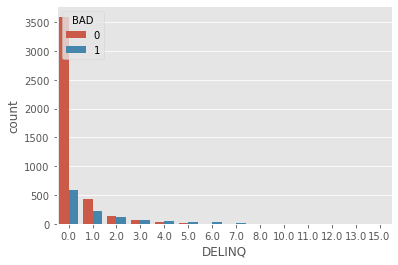

In [19]:
sns.countplot(data=df, x="DELINQ",hue='BAD')

<AxesSubplot:xlabel='REASON', ylabel='count'>

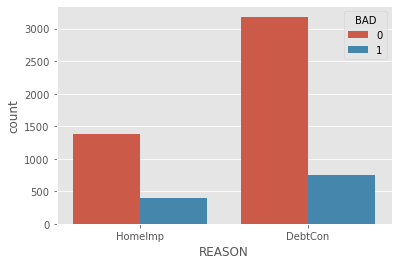

In [20]:
sns.countplot(data=df, x="REASON",hue='BAD')

<AxesSubplot:xlabel='JOB', ylabel='count'>

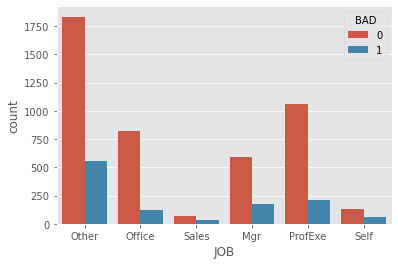

In [21]:
sns.countplot(data=df, x="JOB",hue='BAD')

# 特徵工程(Feature Engineering)
由於各變數間與壞帳發生無顯著關系，這裡僅簡單的將缺漏值補上。

In [22]:
#檢視缺漏值
print( Missing_Counts(df) )

   ColumnName  MissingCount  Percentage(%)
0       VALUE           112           1.88
1        CLNO           222           3.72
2      REASON           252           4.23
3         JOB           279           4.68
4       CLAGE           308           5.17
5        NINQ           510           8.56
6         YOJ           515           8.64
7     MORTDUE           518           8.69
8      DELINQ           580           9.73
9       DEROG           708          11.88
10    DEBTINC          1267          21.26


In [23]:
#將缺漏值填上中位數
df['MORTDUE'].fillna( df.MORTDUE.median(), inplace=True )
df['VALUE'].fillna( df.VALUE.median(), inplace=True )
df['YOJ'].fillna( df.YOJ.median(), inplace=True )
df['DEROG'].fillna( df.DEROG.median(), inplace=True )
df['DELINQ'].fillna( df.DELINQ.median(), inplace=True )
df['CLAGE'].fillna( df.CLAGE.median(), inplace=True )
df['NINQ'].fillna( df.NINQ.median(), inplace=True )
df['CLNO'].fillna( df.CLNO.median(), inplace=True )
df['DEBTINC'].fillna( df.CLNO.median(), inplace=True )

In [24]:
#將缺漏值以多數標籤代替
df['REASON'].fillna( 'DebtCon', inplace=True )
df['JOB'].fillna( 'Other', inplace=True )

In [25]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,20.000000
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,20.000000
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,20.000000
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,1.0,20.0,20.000000
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808717,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [26]:
#將定性且無序的類別透過OneHot Encoding轉換為數字
# OneHot Encoding
OneHot_REASON = pd.get_dummies( df.REASON, prefix='REASON' )
OneHot_JOB = pd.get_dummies( df.JOB, prefix='JOB' )
# 合併 Embarked 編碼後的欄位
df = pd.concat( [ df, OneHot_REASON ], axis=1 )
df.drop( 'REASON', axis=1, inplace=True )

df = pd.concat( [ df, OneHot_JOB ], axis=1 )
df.drop( 'JOB', axis=1, inplace=True )

In [27]:
#最後結果
df

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,20.000000,0,1,0,0,1,0,0,0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,20.000000,0,1,0,0,1,0,0,0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,20.000000,0,1,0,0,1,0,0,0
3,1,1500,65019.0,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,20.000000,1,0,0,0,1,0,0,0
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,20.000000,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,16.0,0.0,0.0,221.808717,0.0,16.0,36.112347,1,0,0,0,1,0,0,0
5956,0,89000,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,1,0,0,0,1,0,0,0
5957,0,89200,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,1,0,0,0,1,0,0,0
5958,0,89800,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,1,0,0,0,1,0,0,0


In [28]:
#選取目標欄位、變數欄位
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [29]:
#產生訓練資料及測試資料
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [30]:
#將資料進行特徵縮放(標準化)，提升模型效率以及降低離群值對模型的影響
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
#載入邏輯斯回歸進行，建立分類模型
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [32]:
#產生準確矩陣及預測準確率
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1145   49]
 [ 203   93]]


0.8308724832214766

結果可見此模型預測準確率約0.83

於測試資料中，1145個為正確預測為好帳，93個預測為壞帳，而49個預測為好帳但實際是壞帳，203為預測是壞帳但實際是好障

In [33]:
#另外套用隨機森林模型進行測試
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1152   42]
 [ 110  186]]


0.897986577181208

結果可見，使用隨機森林模型可將準確率提升至0.89